In [30]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt 

Downloading the price of $GBTC (Grayscale Bitcoin Trust) --> Bitcoin analog

In [31]:
btc = pdr.get_data_yahoo('GBTC')
day = np.arange(1, len(btc) + 1)
btc['day'] = day
btc.drop(columns=['Adj Close', 'Volume'], inplace= True)
btc = btc[['day', 'Open', 'High', 'Low', 'Close']]
btc.tail()

,day,Open,High,Low,Close
Date,,,,,
2022-03-29,1255,32.910000,33.180000,32.299999,32.869999
2022-03-30,1256,32.494999,32.959999,31.520000,32.060001
2022-03-31,1257,32.209999,32.349998,30.510000,30.540001
2022-04-01,1258,30.520000,32.139999,30.450001,32.049999
2022-04-04,1259,31.840000,32.150002,31.040001,32.080002


Moving average momentum strategy
- Generate signal based on price movement or statistical action
- Moving average (MA) crossover is our signal
- 'Long' when shorter term MA crosses above longer term MA
- 'Short' when shorter term MA crosses below longer term MA
- Real life variation should be expected

In [32]:
btc['14_day'] = btc['Close'].rolling(9).mean()
btc['30_day'] = btc['Close'].rolling(30).mean()
btc[25:35]

,day,Open,High,Low,Close,14_day,30_day
Date,,,,,,,
2017-05-11,26,2.422527,2.636264,2.340659,2.351648,2.065189,NaN
2017-05-12,27,2.351099,2.351099,2.017692,2.065934,2.106105,NaN
2017-05-15,28,2.076923,2.241758,2.071978,2.197802,2.166667,NaN
2017-05-16,29,2.229670,2.252747,2.175824,2.252747,2.213675,NaN
2017-05-17,30,2.362747,2.417473,2.318681,2.324176,2.264347,1.705535
2017-05-18,31,2.369505,2.416484,2.329670,2.362637,2.303419,1.740883
2017-05-19,32,2.396484,2.553516,2.385824,2.406593,2.326618,1.776267
2017-05-22,33,2.747253,2.911978,2.483516,2.648352,2.336386,1.819491
2017-05-23,34,2.829066,3.241758,2.807692,3.230769,2.426740,1.881396


## Signal

In [33]:
btc['signal'] = np.where(btc['14_day'] > btc['30_day'], 1, 0)
btc['signal'] = np.where(btc['14_day'] < btc['30_day'], -1, btc['signal'])
btc.dropna(inplace=True)
btc[500:600]

,day,Open,High,Low,Close,14_day,30_day,signal
Date,,,,,,,,
2019-05-14,530,10.630,11.00,9.11,9.48,8.207222,7.077833,1
2019-05-15,531,10.000,10.67,9.71,10.55,8.618333,7.238167,1
2019-05-16,532,10.100,10.48,9.81,9.94,8.908889,7.363167,1
2019-05-17,533,8.840,9.45,8.75,9.23,9.098889,7.476833,1
2019-05-20,534,9.990,10.19,9.69,9.95,9.336667,7.599833,1
...,...,...,...,...,...,...,...,...
2019-09-27,625,9.960,10.05,9.60,9.83,11.576445,12.376267,-1
2019-09-30,626,10.025,10.65,9.95,10.59,11.332000,12.280933,-1
2019-10-01,627,10.730,10.80,9.76,9.90,11.033333,12.152933,-1


In [34]:
btc['return'] = np.log(btc['Close']).diff()
btc['system_return'] = btc['signal'] * btc['return']
btc['entry'] = btc.signal.diff()
btc.head()

,day,Open,High,Low,Close,14_day,30_day,signal,return,system_return,entry
Date,,,,,,,,,,,
2017-05-17,30,2.362747,2.417473,2.318681,2.324176,2.264347,1.705535,1,NaN,NaN,NaN
2017-05-18,31,2.369505,2.416484,2.329670,2.362637,2.303419,1.740883,1,0.016413,0.016413,0.0
2017-05-19,32,2.396484,2.553516,2.385824,2.406593,2.326618,1.776267,1,0.018434,0.018434,0.0
2017-05-22,33,2.747253,2.911978,2.483516,2.648352,2.336386,1.819491,1,0.095725,0.095725,0.0
2017-05-23,34,2.829066,3.241758,2.807692,3.230769,2.426740,1.881396,1,0.198783,0.198783,0.0


Green arrows indicate buy signals. Red arrows indicate sell signals.

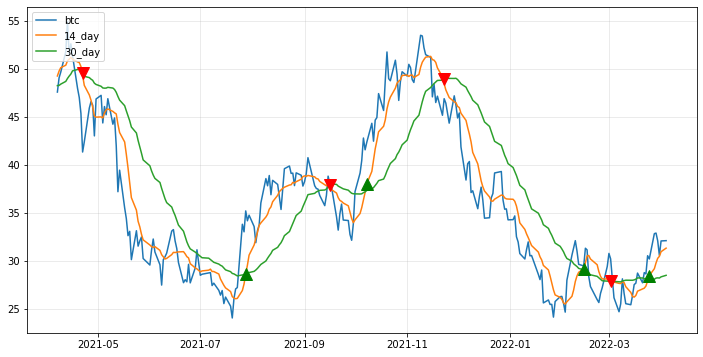

In [35]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(btc.iloc[-252:]['Close'], label = 'btc')
plt.plot(btc.iloc[-252:]['14_day'], label = '14_day')
plt.plot(btc.iloc[-252:]['30_day'], label = '30_day')
plt.plot(btc[-252:].loc[btc.entry == 2].index, btc[-252:]['14_day'][btc.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(btc[-252:].loc[btc.entry == -2].index, btc[-252:]['30_day'][btc.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);